# Derivative of algorithm is in my Medium
https://roger010620.medium.com/%E9%AB%98%E6%96%AF%E9%81%8E%E7%A8%8B-gaussion-process-%E5%90%ABpython%E5%AF%A6%E4%BD%9C-642965af8b2<br>
the noise signal $\epsilon_n$ is Gaussian distributed by $\epsilon_n$ ∼ N (0, β−1) with β −1 = 1.
1. Implement the Gaussian process with the exponential-quadratic kernel function given by
$$k(x_n,x_m)=\theta_0exp(-\frac{\theta_1 }{ 2 }||x_n-x_m||^2)+\theta_2+\theta_3x_n^Tx_m$$
where the hyperparameters θ = {θ0, θ1, θ2, θ3} are fixed. Use the training set and run four different combinations:<br>
• linear kernel θ = {0, 0, 0, 1}<br>
• squared exponential kernel θ = {1, 4, 0, 0}<br>
• exponential-quadratic kernel θ = {1, 4, 0, 5}<br>
• exponential-quadratic kernel θ = {1, 32, 5, 5}<br>
2. Plot the prediction result like Figure 6.8 of textbook for training set but one standard deviation instead of two and without the green curve. The title of the figure should be the value of hyperparameters used in this model. The red line shows the mean m(·) of the GP predictive distributioin. The pink region corresponds to plus and minus one standard deviation. Training data points are shown in blue. An example is shown as follows.
3. Calculate the corresponding root-mean-square errors
$$E_{rms}=\sqrt{\frac{1 }{ N }(m(x_n)-t_n)^2}$$
4. Try to tune the hyperparameters by apply the automatic relevance determination (ARD)

In [1]:
import numpy as np
from numpy.linalg import inv
import matplotlib.pyplot as plt
import scipy.io as io
from gaussian_process import gaussian_process
plt.rcParams['font.sans-serif']=['SimHei'] 
plt.rcParams['axes.unicode_minus']=False 

data = io.loadmat('gp.mat')['x']
label = io.loadmat('gp.mat')['t']
x_train = data[0:60]
x_test = data[60:100]
t_train = label[0:60]
t_test = label[60:100]

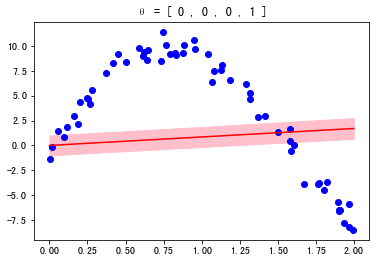

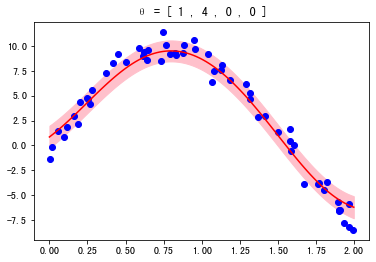

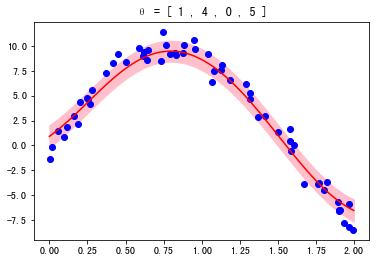

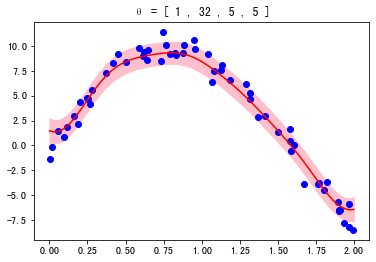

In [2]:
theta = [[0,0,0,1],[1,4,0,0],[1,4,0,5],[1,32,5,5]]
rms = []
for i in theta:
    gp = gaussian_process(i)
    line = np.linspace(0.,2.,100).reshape(100,1)
    gp.fit(x_train, t_train)
    mx, vx = gp.predict(line)
    vx = np.array([vx[j][j] for j in range(len(vx))])
    plt.plot(x_train, t_train,'bo')
    plt.plot(line, mx, linestyle = '-', color = 'red')
    plt.fill_between(line.reshape(-1), (mx.reshape(-1)-vx), (mx.reshape(-1)+vx), color = 'pink')
    plt.title('θ = [ '+str(i[0])+' , '+str(i[1])+' , '+str(i[2])+' , '+str(i[3])+' ]')
    #plt.savefig(str(i)+'.png')
    plt.show()
    rms.append([gp.RMS(x_train, t_train),gp.RMS(x_test, t_test)])

import pandas as pd
rms = pd.DataFrame(rms)
rms.rename(columns={0:'train',1:'test'},inplace=True)
rms.rename(index={0:'[0,0,0,1]',1:'[1,4,0,0]',2:'[1,4,0,5]',3:'[1,32,5,5]'},inplace=True)
#rms.to_excel('rms.xlsx')

In [3]:
rms

,train,test
"[0,0,0,1]",6.657590,6.748539
"[1,4,0,0]",1.052243,1.298796
"[1,4,0,5]",1.028840,1.286090
"[1,32,5,5]",0.964045,1.258469


train error = 0.841, test error = 1.127


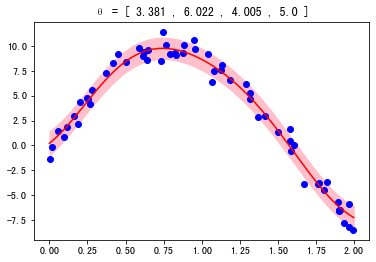

In [4]:
theta = [3.,6.,4.,5.]
gp = gaussian_process(theta)
gp.fit(x_train, t_train)
gp.ard(0.001)
print(r"train error = %.3f, test error = %.3f"%(gp.RMS(x_train, t_train),gp.RMS(x_test, t_test)))
line = np.linspace(0.,2.,100).reshape(100,1)
mx, vx = gp.predict(line)
vx = np.array([vx[j][j] for j in range(len(vx))])
plt.plot(x_train, t_train,'bo')
plt.plot(line, mx, linestyle = '-', color = 'red')
plt.fill_between(line.reshape(-1), (mx.reshape(-1)-vx), (mx.reshape(-1)+vx), color = 'pink')
plt.title('θ = [ '+str(round(gp.thetas[0],3))+' , '+str(round(gp.thetas[1],3))+' , '+str(round(gp.thetas[2],3))+' , '+str(round(gp.thetas[3],3))+' ]')
plt.show()